# K-Means Clustering 

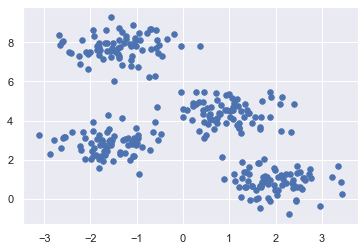

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set() #Plot styling
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1],s=30)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

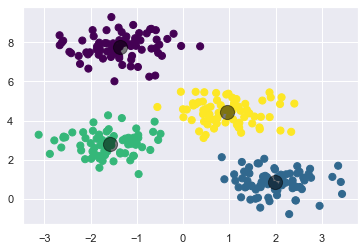

In [8]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2a. Assign labels based on closest center
        labels=pairwise_distances_argmin(X,centers)
        
        #2b. Find new centers from mean of points
        new_centers= np.array([X[labels==i].mean(0)
                              for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], s=200, c='black', alpha=0.5)

# Colour Compression - 1

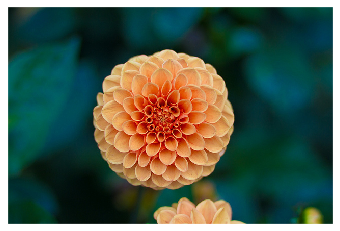

In [10]:
from sklearn.datasets import load_sample_image
sample=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(sample)

In [12]:
sample.shape

(427, 640, 3)

In [42]:
sample

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [13]:
data= sample/ 255.0 #Use 0....1 scale
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [43]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [24]:
def plot_pixels(data, title, colors=None,N=10000):
    if colors is None:
        colors=data
    #choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B=data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker=',')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R, B, color=colors, marker=',')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))

    fig.suptitle(title,size=20)

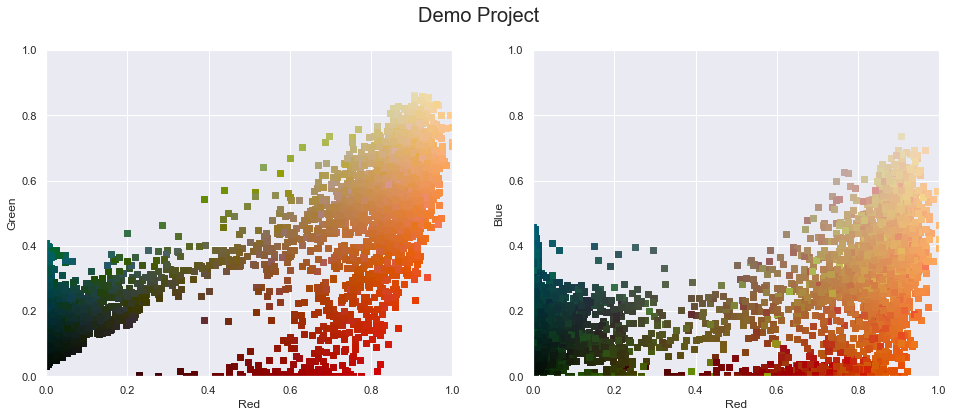

In [25]:
plot_pixels(data,title="Demo Project - With colors")

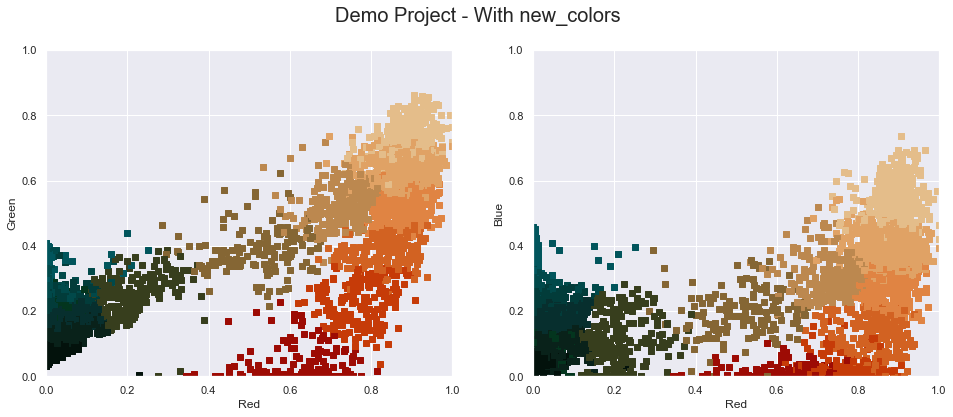

In [30]:
import warnings; warnings.simplefilter('ignore') #Fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Demo Project - With new_colors")

Text(0.5, 1.0, 'Recolored Image')

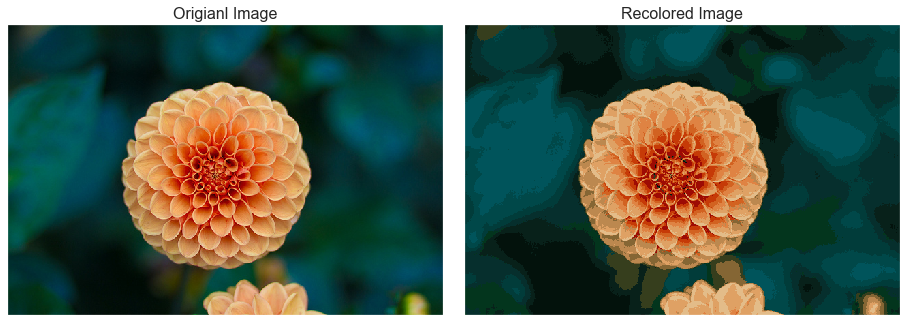

In [31]:
sample_recolored=new_colors.reshape(sample.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(sample)
ax[0].set_title("Origianl Image", size=16)

ax[1].imshow(sample_recolored)
ax[1].set_title("Recolored Image", size=16)

# Colour Compression -2

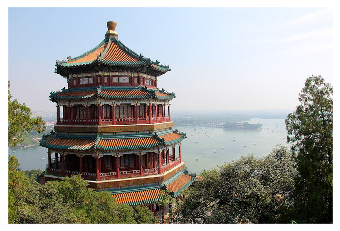

In [32]:
from sklearn.datasets import load_sample_image
sample=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(sample)

In [34]:
sample.shape

(427, 640, 3)

In [40]:
sample

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [35]:
data= sample/ 255.0 #Use 0....1 scale
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [41]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [36]:
def plot_pixels(data, title, colors=None,N=10000):
    if colors is None:
        colors=data
    #choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B=data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker=',')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R, B, color=colors, marker=',')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))

    fig.suptitle(title,size=20)

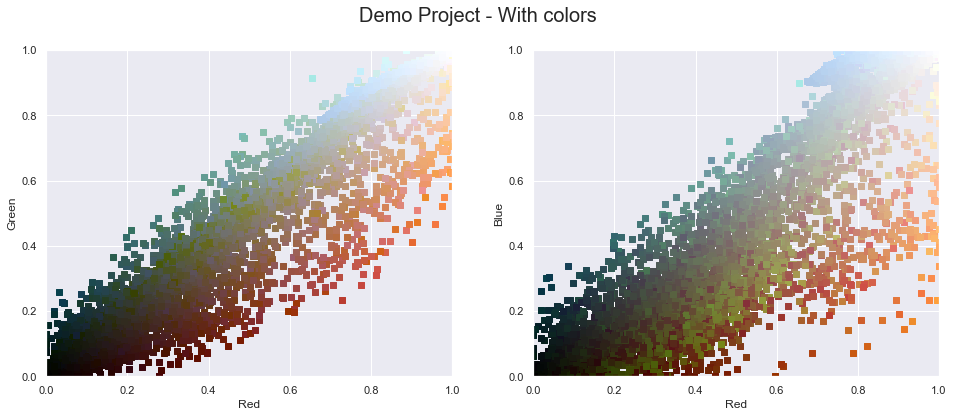

In [37]:
plot_pixels(data,title="Demo Project - With colors")

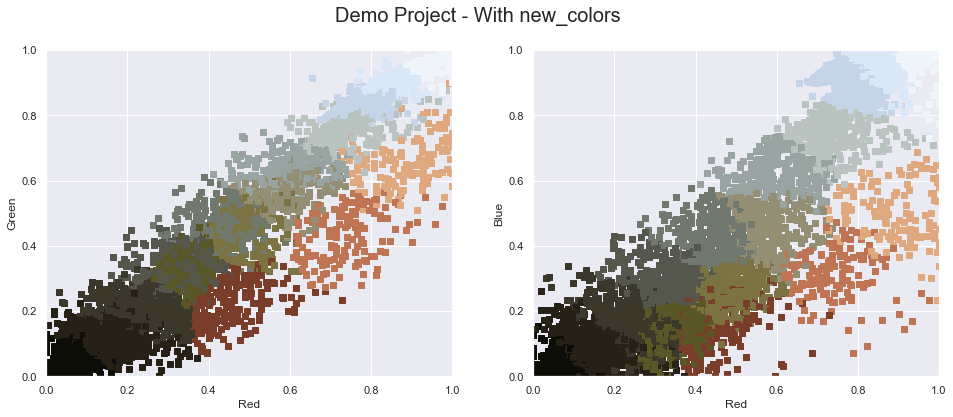

In [38]:
import warnings; warnings.simplefilter('ignore') #Fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Demo Project - With new_colors")

Text(0.5, 1.0, 'Recolored Image')

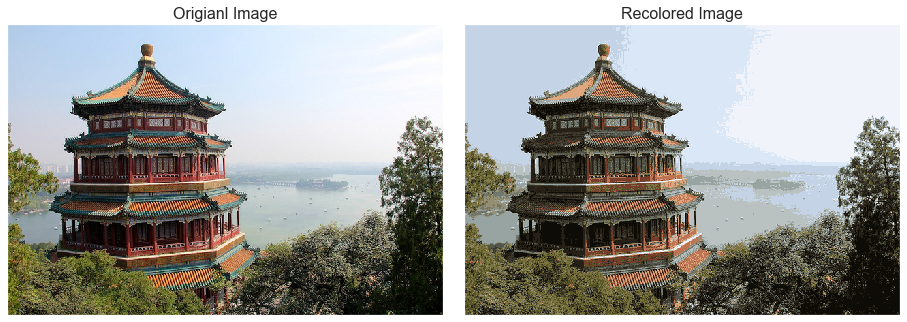

In [39]:
sample_recolored=new_colors.reshape(sample.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(sample)
ax[0].set_title("Origianl Image", size=16)

ax[1].imshow(sample_recolored)
ax[1].set_title("Recolored Image", size=16)